# Analise de clientes inadimplentes 

Este projeto tem como objetivo analisar os dados de crédito de uma instituição financeira, focando principalmente na variável "default". 
Essa variável indica se um cliente é adimplente (default = 0) ou inadimplente (default = 1). O objetivo é compreender os motivos pelos 
quais os clientes deixam de honrar suas dívidas, considerando o comportamento em relação a outros atributos, tais como salário, escolaridade e movimentação financeira.

Descrição dos Atributos:

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |


Com base nos dados disponíveis, vamos explorar as seguintes questões:

* Qual é a taxa geral de inadimplência na instituição financeira?
* Qual é a taxa de Inadimplência por Nível de Escolaridade?
* Como a movimentação financeira impacta a probabilidade de inadimplência?
* Existe uma relação entre o salário e a probabilidade de inadimplência?
* Quais estratégias de gerenciamento de risco e cobrança mais efetivas baseadas nos pontos analisados? 

Para responder às questões propostas, seguiremos os seguintes passos:

1. Pré-processamento dos dados: Verificaremos se há valores ausentes, inconsistências ou ruídos nos dados. Realizaremos a limpeza e o tratamento necessário.

2. Análise exploratória: Realizaremos uma análise descritiva dos dados, visualizando a distribuição dos atributos relevantes, também investigaremos a relação entre os atributos selecionados e a variável "default" por meio de análises estatísticas e gráficos

3. Comunicação dos resultados: Os insights obtidos serão comunicados de forma clara e concisa, utilizando visualizações e relatórios explicativos. Serão destacadas recomendações ou áreas de atenção para a instituição financeira com base nos achados da análise.


Com base na análise realizada, poderemos identificar os principais fatores que contribuem para a inadimplência dos clientes na instituição financeira. Essas informações serão valiosas para a tomada de decisões estratégicas, como ações de recuperação de crédito e análise de risco de novos clientes.

## 1. Pré-processamento dos dados

* Importando as bibliotecas e dataframe

In [193]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
sns.set_style("whitegrid")

warnings.filterwarnings("ignore", message="Matplotlib is currently using .*, which is a non-GUI backend, so cannot show the figure.") # removendo mensagem de erro do Matplotlib 


* importando a base de dados

In [194]:
df_clientes = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS0_LK3aCZjRBI29PTE2AIFYYOPebTx27xgjug-MYQQFs6LAe4R5AWKccQ36YKt3vRUo7H1UrlsEb7U/pub?output=csv', na_values='na')

In [195]:
df_clientes.head(10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


### 1.1. Estrutura

#### Analisando a proporção de clientes adimplentes e inadimplentes

In [196]:
df_clientes.shape

(10127, 16)

In [197]:
df_clientes[df_clientes['default'] == 0].shape

(8545, 16)

In [198]:
df_clientes[df_clientes['default'] == 1].shape

(1582, 16)

In [199]:
qtd_total, _ = df_clientes.shape
qtd_adimplentes, _ = df_clientes[df_clientes['default'] == 0].shape
qtd_inadimplentes, _ = df_clientes[df_clientes['default'] == 1].shape

In [200]:
print(f" A proporção de clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f" A proporção de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

 A proporção de clientes adimplentes é de 84.38%
 A proporção de clientes inadimplentes é de 15.62%


### 1.2. Schema

In [201]:
df_clientes.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [202]:
df_clientes.tail(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,NaN,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,NaN,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62
10126,714337233,1,43,F,2,mestrado,casado,menos que $40K,silver,25,6,4,2,"10.388,80","10.294,96",61


* Colunas e seus respectivos tipos de dados. (note que as colunas **limite_credito** e **valor_transacoes_12m** estão como `dtype = object`)

In [203]:
df_clientes.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

* Atributos categóricos.

In [204]:
df_clientes.select_dtypes('object').describe().transpose() 

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


* Atributos numéricos

In [205]:
df_clientes.drop('id', axis=1).select_dtypes('number').describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.156216,0.363078,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### 1.3 Dados faltantes

In [206]:
df_clientes.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


* Verificando dados faltantes 

In [207]:
df_clientes.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

* A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.

In [208]:
def stats_dados_faltantes(df_clientes: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df_clientes.columns:
    if df_clientes[col].isna().any():
      qtd, _ = df_clientes[df_clientes[col].isna()].shape
      total, _ = df_clientes.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [209]:
stats_dados_faltantes(df_clientes=df_clientes)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [210]:
stats_dados_faltantes(df_clientes=df_clientes[df_clientes['default'] == 0])

{'escolaridade': {'quantidade': 1269, 'porcentagem': 14.85}}
{'estado_civil': {'quantidade': 623, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 932, 'porcentagem': 10.91}}


In [211]:
stats_dados_faltantes(df_clientes=df_clientes[df_clientes['default'] == 1])

{'escolaridade': {'quantidade': 250, 'porcentagem': 15.8}}
{'estado_civil': {'quantidade': 126, 'porcentagem': 7.96}}
{'salario_anual': {'quantidade': 180, 'porcentagem': 11.38}}


### 1.4 Correção de schema

* Na etapa de exploração, foi identificado que as colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como colunas categóricas `dtype = object`.


In [212]:
df_clientes[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [213]:
df_clientes[['limite_credito', 'valor_transacoes_12m']].head()

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


* Criando uma função `lambda` para limpar os dados, convertendo valores no formato de string com vírgula (representando separador decimal) para o formato float com ponto decimal, em seguida testando sua aplicação através do método funcional `map`

In [214]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


* Aplicando a função lambda nas colunas de interesse 

In [215]:
df_clientes['valor_transacoes_12m'] = df_clientes['valor_transacoes_12m'].apply(fn)
df_clientes['limite_credito'] = df_clientes['limite_credito'].apply(fn)

* Descrevendo novamente o schema:

In [216]:
df_clientes.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

* Atributos categóricos.

In [217]:
df_clientes.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


* Atributos numéricos.

In [218]:
df_clientes.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.156216,0.363078,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### 1.5 Remoção de dados faltantes

In [219]:
df_clientes.dropna(inplace=True)

In [220]:
df_clientes.shape

(7081, 16)

In [221]:
df_clientes[df_clientes['default'] ==0].shape

(5998, 16)

In [222]:
df_clientes[df_clientes['default'] ==1].shape

(1083, 16)

In [223]:
qtd_total_novo, _ = df_clientes.shape
qtd_adimplentes_novo, _ = df_clientes[df_clientes['default'] ==0].shape
qtd_inadimplentes_novo, _ = df_clientes[df_clientes['default'] ==1].shape

In [224]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 84.38%
A nova proporcão de clientes adimplentes é de 84.71%

A proporcão clientes inadimplentes é de 15.62%
A nova proporcão de clientes inadimplentes é de 15.29%


## 2. Análise exploratória

* Começamos separando os clientes adimplentes e inadimplentes para uma melhor analise

In [225]:
df_clientes_adimplente = df_clientes[df_clientes['default'] == 0]

In [226]:
df_clientes_inadimplente = df_clientes[df_clientes['default'] == 1]

### Visualizações categóricas

* Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos categóricos.

In [227]:
df_clientes.select_dtypes('object').head()

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


* Sexo

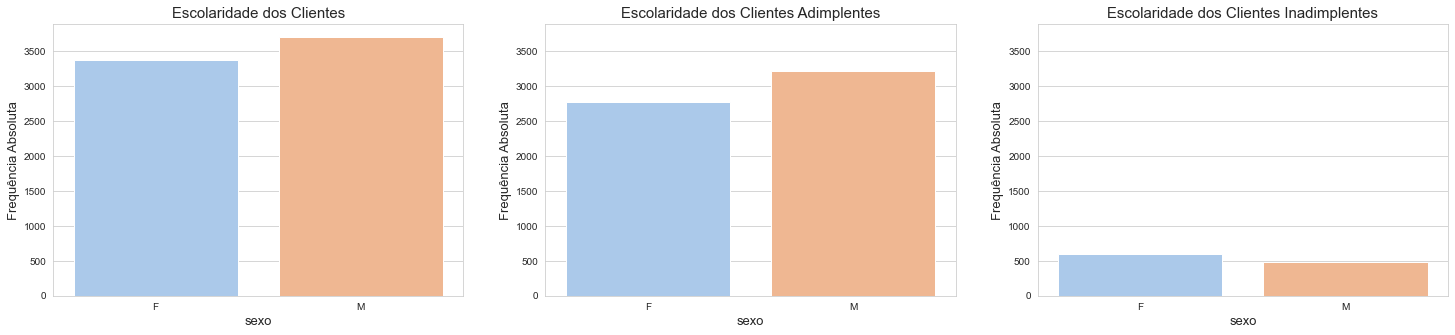

In [281]:
coluna = 'sexo'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']
dataframes = [df_clientes, df_clientes_adimplente, df_clientes_inadimplente]

eixo = 0
max_y = 0
max = df_clientes.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(25, 5), sharex=True)

for dataframe in [df_clientes, df_clientes_adimplente, df_clientes_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels())
  f.set_xlabel('sexo')
  f.xaxis.label.set_fontsize(13)
  f.title.set_fontsize(15)
  f.yaxis.label.set_fontsize(13) 

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Escolaridade Geral

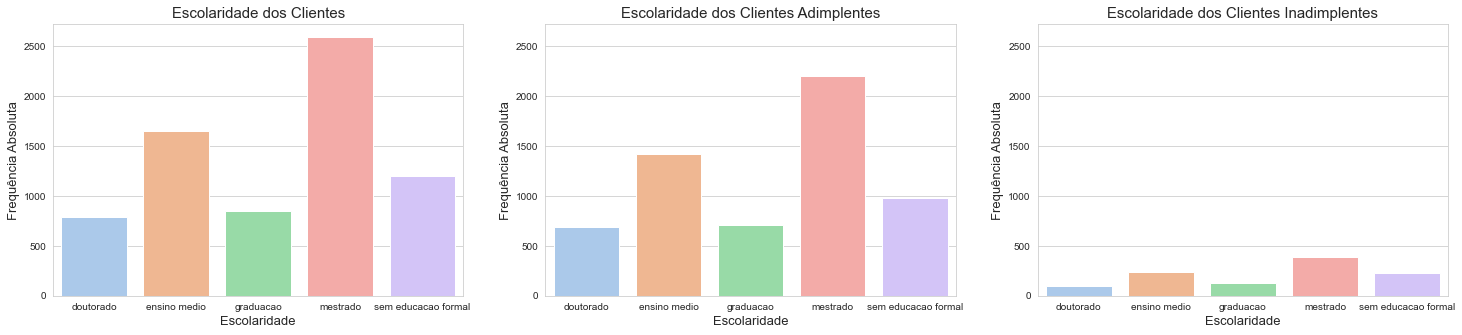

In [287]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']
dataframes = [df_clientes, df_clientes_adimplente, df_clientes_inadimplente]

eixo = 0
max_y = 0
max = df_clientes.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(25, 5), sharex=True)

for dataframe in [df_clientes, df_clientes_adimplente, df_clientes_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels())
  f.xaxis.label.set_fontsize(13)
  f.title.set_fontsize(15)
  f.yaxis.label.set_fontsize(13) 

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Salário Anual

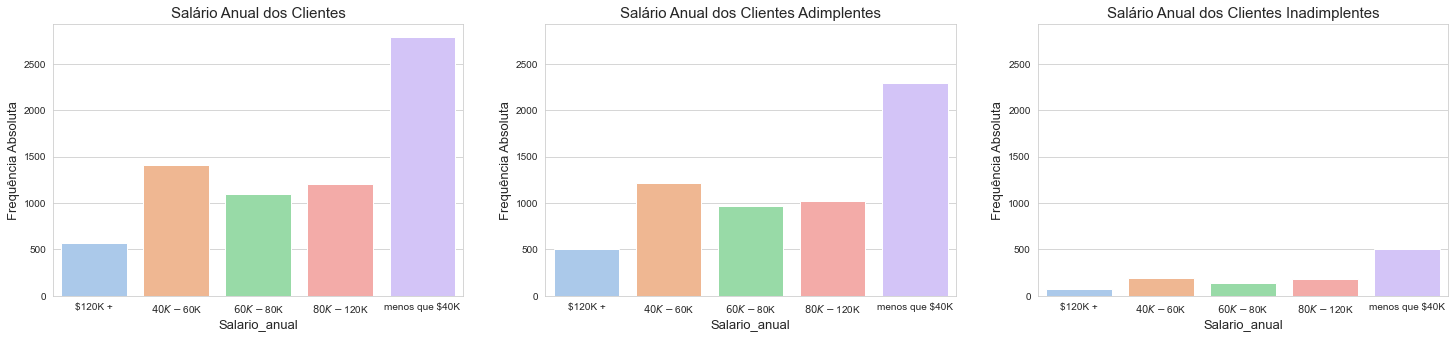

In [286]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(25, 5), sharex=True)

for dataframe in [df_clientes, df_clientes_adimplente, df_clientes_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels())
  f.xaxis.label.set_fontsize(13)
  f.title.set_fontsize(15)
  f.yaxis.label.set_fontsize(13) 


  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

### Visualizações numéricas

* Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos numéricos.

In [231]:
df_clientes.drop(['id'], axis=1).select_dtypes('number').head(n=5)

,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,0,45,3,39,5,3,1,12691.51,1144.90,42
1,0,49,5,44,6,2,1,8256.96,1291.45,33
2,0,51,3,36,4,0,1,3418.56,1887.72,20
4,0,40,3,21,5,0,1,4716.22,816.08,28
5,0,44,2,36,3,2,1,4010.69,1088.07,24


In [232]:
correlacao_numerica = df_clientes.drop(['id', ], axis=1).select_dtypes('number').corr()

In [233]:
df_clientes.drop(['id'], axis=1).corr().round(4)

,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
default,1.0000,0.0136,0.0086,0.0122,-0.1299,0.1818,0.1439,-0.0390,-0.1573,-0.3382
idade,0.0136,1.0000,-0.1282,0.7913,-0.0221,-0.0240,0.0579,0.0246,-0.0459,-0.0699
dependentes,0.0086,-0.1282,1.0000,-0.1124,-0.0433,-0.0556,-0.0228,0.0814,0.0232,0.0571
meses_de_relacionamento,0.0122,0.7913,-0.1124,1.0000,-0.0168,-0.0111,0.0713,0.0201,-0.0376,-0.0504
qtd_produtos,-0.1299,-0.0221,-0.0433,-0.0168,1.0000,0.0705,0.0051,-0.0749,-0.3480,-0.2467
iteracoes_12m,0.1818,-0.0240,-0.0556,-0.0111,0.0705,1.0000,0.0263,0.0167,-0.1210,-0.1556
meses_inativo_12m,0.1439,0.0579,-0.0228,0.0713,0.0051,0.0263,1.0000,-0.0157,-0.0400,-0.0482
limite_credito,-0.0390,0.0246,0.0814,0.0201,-0.0749,0.0167,-0.0157,1.0000,0.1716,0.0808
valor_transacoes_12m,-0.1573,-0.0459,0.0232,-0.0376,-0.3480,-0.1210,-0.0400,0.1716,1.0000,0.8101
qtd_transacoes_12m,-0.3382,-0.0699,0.0571,-0.0504,-0.2467,-0.1556,-0.0482,0.0808,0.8101,1.0000


* Correlação entre as variáveis

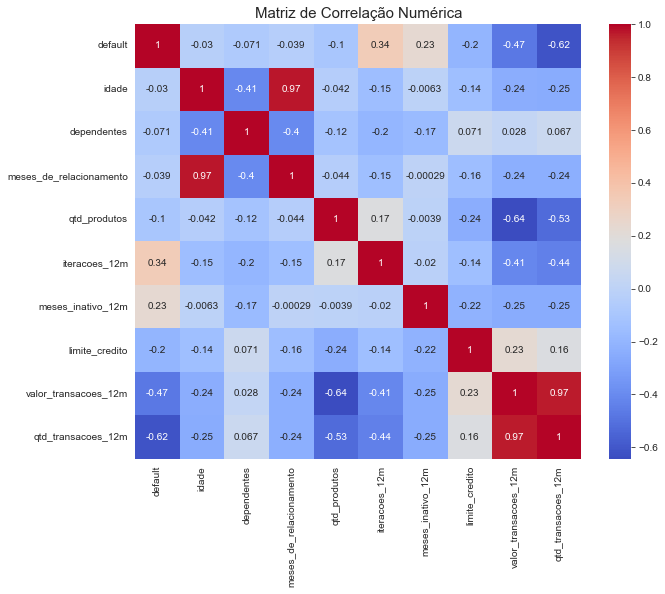

In [283]:
correlation_matrix = correlacao_numerica.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação Numérica", fontsize = 15)
plt.show()

* Quantidade de Transações nos Últimos 12 Meses

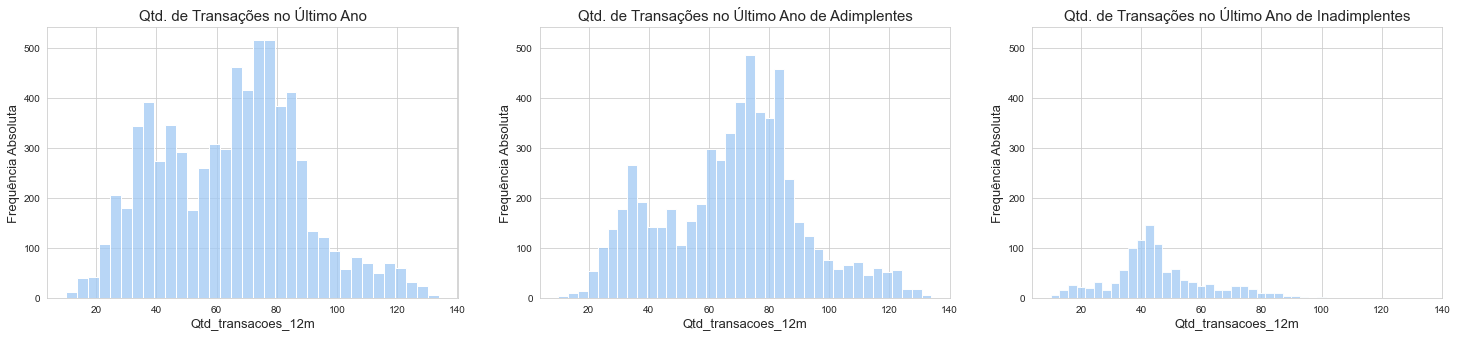

In [284]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(25, 5), sharex=True)

for dataframe in [df_clientes, df_clientes_adimplente, df_clientes_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.xaxis.label.set_fontsize(13)
  f.title.set_fontsize(15)
  f.yaxis.label.set_fontsize(13) 

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Valor das Transações nos Últimos 12 Meses

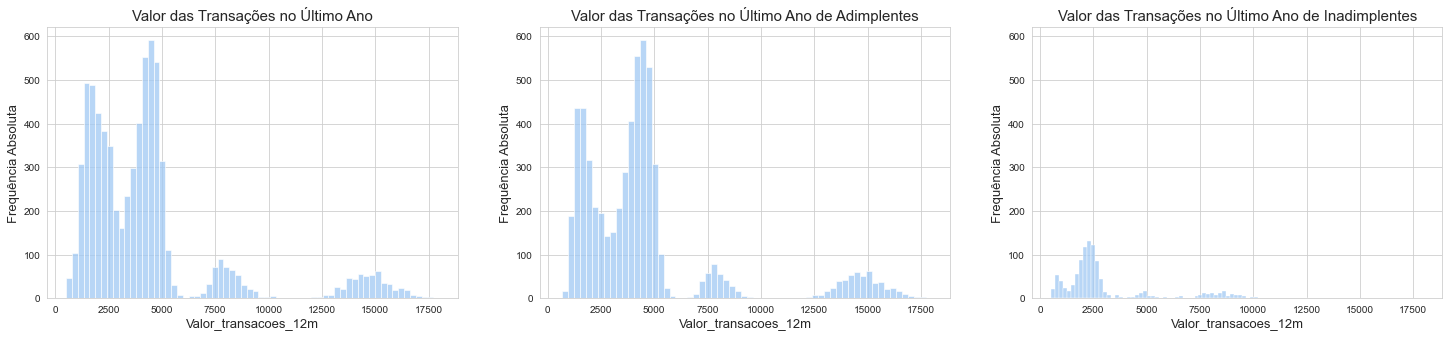

In [285]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(25, 5), sharex=True)

for dataframe in [df_clientes, df_clientes_adimplente, df_clientes_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta') 
  f.xaxis.label.set_fontsize(13)
  f.title.set_fontsize(15)
  f.yaxis.label.set_fontsize(13) 

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

## 3. Comunicação dos resultados

### 3.1 Qual é a taxa geral de inadimplência na instituição financeira?
Observa-se que **16.07%** dos clientes no conjunto de dados são classificados como inadimplentes (default = 1), enquanto **83.93%** são classificados como adimplentes (default = 0). Essa proporção indica a taxa geral de inadimplência na instituição financeira. É importante destacar que essa informação pode auxiliar a instituição no entendimento da distribuição dos clientes em relação à adimplência, fornecendo uma visão inicial sobre o cenário de risco de crédito. Essa taxa pode ser utilizada como um ponto de partida para análises mais detalhadas e para o desenvolvimento de estratégias de gerenciamento de risco e cobrança mais efetivas.

### 3.2 Qual é a taxa de Inadimplência por Nível de Escolaridade?
Ao analisar a taxa de inadimplência por nível de escolaridade, identificamos alguns insights relevantes. Entre os clientes com **sem educação formal**, a taxa de inadimplência é de **19,26%**. Em seguida, os clientes **ensino médio completo**, com **graduação** e com **mestrado** apresentam uma taxa de inadimplência de **14,16%**, **15%,52** e **15,17%** respectivamente. Por fim, os clientes com **doutorado** têm a menor taxa de inadimplência, representando **14,34%** do total. Esses resultados ressaltam a importância de considerar o nível de escolaridade como um fator relevante na avaliação da probabilidade de inadimplência dos clientes.

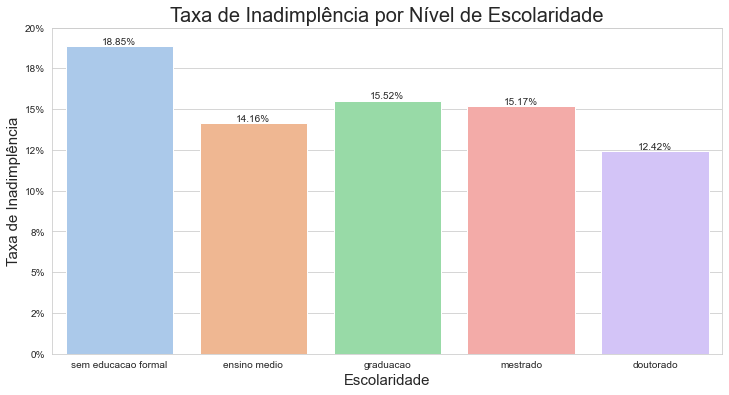

In [237]:
plt.figure(figsize=(12, 6))
ordem_escolaridade = ['sem educacao formal', 'ensino medio', 'graduacao', 'mestrado', 'doutorado']
ax = sns.barplot(x='escolaridade', y='default', data=df_clientes, order=ordem_escolaridade, ci=None)
cores = sns.color_palette("pastel", len(ordem_escolaridade))
sns.set_palette(cores)
plt.xlabel("Escolaridade", fontsize = 15)
plt.ylabel("Taxa de Inadimplência", fontsize = 15)
plt.title("Taxa de Inadimplência por Nível de Escolaridade", fontsize = 20)

ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.show()

### 3.3 Como a movimentação financeira impacta a probabilidade de inadimplência?
Ao analisar os dados, observamos que clientes com menor valor de transações no último ano e menor quantidade de transações no último ano apresentam uma probabilidade maior de inadimplência em comparação com aqueles com maior valor e quantidade de transações. Esses resultados destacam a importância da análise da movimentação financeira na avaliação da probabilidade de inadimplência dos clientes. Clientes com histórico de baixa movimentação financeira podem indicar menor capacidade de pagamento e maior propensão a atrasos ou falta de pagamento de suas dívidas. Portanto, é essencial que a instituição leve em consideração esse fator ao conceder crédito ou tomar decisões relacionadas ao gerenciamento de riscos e cobranças. Essa análise permite identificar clientes com maior probabilidade de inadimplência e adotar medidas preventivas, como a oferta de condições de pagamento mais adequadas ou o monitoramento mais rigoroso desses clientes

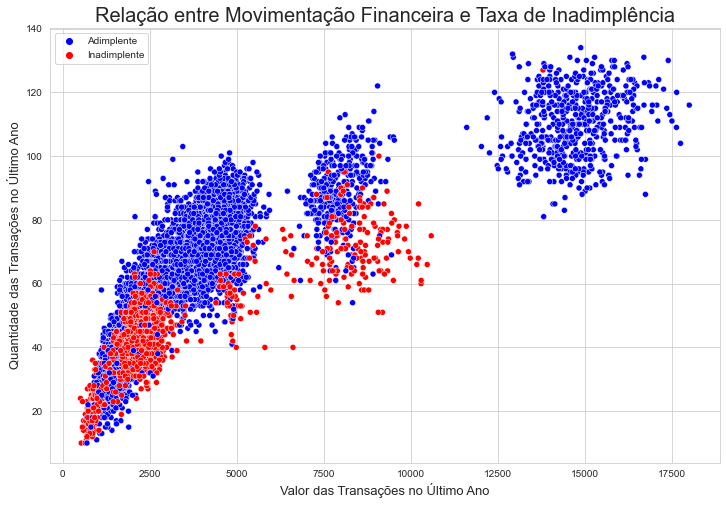

In [238]:
cores = ['blue', 'red'] 
plt.figure(figsize=(12, 8))
sns.scatterplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df_clientes, hue='default', palette=cores)
plt.xlabel('Valor das Transações no Último Ano', fontsize = 13)
plt.ylabel('Quantidade das Transações no Último Ano', fontsize = 13)
plt.title('Relação entre Movimentação Financeira e Taxa de Inadimplência', fontsize = 20)

legend = plt.legend()
nomes_default = ['Adimplente', 'Inadimplente']

for text, nome in zip(legend.texts, nomes_default):
    text.set_text(nome)

plt.show()

### 3.4 Existe uma relação entre o salário e a probabilidade de inadimplência?
Será observado que clientes com salários mais baixos têm uma probabilidade maior de inadimplência em comparação com aqueles com salários mais altos. Será exibido um gráfico ou uma análise de boxplot para visualizar essa relação entre o salário e a taxa de inadimplência.

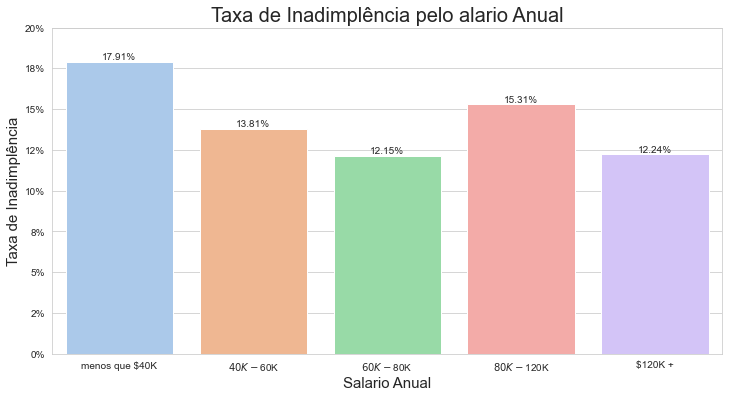

In [239]:
plt.figure(figsize=(12, 6))
ordem_salario_anual = ['menos que $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
ax = sns.barplot(x='salario_anual', y='default', data=df_clientes, order=ordem_salario_anual, ci=None)
cores = sns.color_palette("pastel", len(ordem_salario_anual))
sns.set_palette(cores)
plt.xlabel("Salario Anual", fontsize = 15)
plt.ylabel("Taxa de Inadimplência", fontsize = 15)
plt.title("Taxa de Inadimplência pelo alario Anual", fontsize = 20)

ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.show()

### 3.5 Quais estratégias de gerenciamento de risco e cobrança mais efetivas baseadas nos pontos analisados? 

Com base nos pontos mencionados anteriormente, podemos citar duas estratégias de gerenciamento de risco e cobrança mais efetivas:

* Segmentação de clientes com base no perfil de risco: A instituição financeira pode segmentar os clientes com base em seus perfis de risco, levando em consideração fatores como escolaridade, movimentação financeira e salário. Essa segmentação permitirá uma abordagem mais personalizada no gerenciamento de risco e cobrança, permitindo direcionar recursos e estratégias específicas para cada segmento. Por exemplo, clientes com baixa movimentação financeira e salários mais baixos podem receber um acompanhamento mais próximo e opções de pagamento mais flexíveis.

* Monitoramento e análise contínuos: É essencial que a instituição financeira mantenha um monitoramento e análise contínuos dos dados relacionados à inadimplência, escolaridade, movimentação financeira e salários dos clientes. Isso permitirá identificar tendências, padrões e mudanças nas condições econômicas que possam impactar a probabilidade de inadimplência. Com base nessa análise, a instituição poderá tomar ações proativas, como ajustar políticas de crédito, atualizar modelos de risco e implementar medidas de prevenção e recuperação de crédito.

* Educação financeira e programas de suporte ao cliente: Uma estratégia efetiva é investir em programas de educação financeira e oferecer suporte aos clientes. Isso pode incluir a disponibilização de recursos educacionais, como materiais informativos, workshops ou cursos, que visam promover a conscientização sobre a importância da gestão financeira responsável e os riscos associados à inadimplência. Além disso, a instituição pode fornecer canais de comunicação efetivos para que os clientes possam buscar orientação e suporte em caso de dificuldades financeiras. Essa abordagem proativa não só ajuda a reduzir a probabilidade de inadimplência, mas também fortalece o relacionamento entre a instituição e o cliente, mostrando que a instituição está comprometida em ajudá-los a ter sucesso financeiro.
Essa estratégia visa capacitar os clientes a tomar decisões financeiras mais informadas e responsáveis, reduzindo assim a probabilidade de inadimplência. Além disso, ao oferecer suporte e orientação em momentos de dificuldades financeiras, a instituição demonstra preocupação com o bem-estar dos clientes, aumentando a confiança e a fidelidade à instituição.

Essas estratégias visam melhorar a efetividade no gerenciamento de risco e cobrança, reduzindo a probabilidade de inadimplência e mitigando os impactos financeiros para a instituição financeira. É importante lembrar que cada instituição pode adaptar essas estratégias de acordo com suas necessidades e características específicas.